Javier Alejandro Ortiz Silva

## Taller 2
## [Introducción a los Sistemas Inteligentes 2020-2](https://fagonzalezo.github.io/iis-2020-2/)
---

## Puzzle Giratorio (Spin Puzzle)

El siguiente rompecabezas, llamado Spin Puzzle o Puzzle Giratorio, está formado por nueve fichas numeradas del 1 al 9, conectadas a cuatro discos llamados A, B, C y D de la siguiente manera:

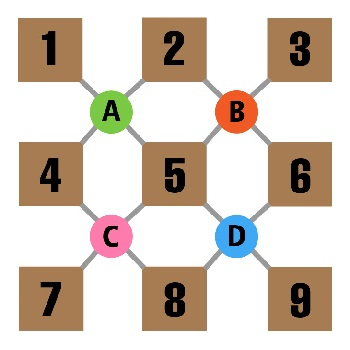

Es posible rotar cada uno de los discos, uno a la vez, en sentido horario (como las manecillas del reloj) o antihorario (contrario a las manecillas del reloj). Las fichas que estén alrededor del disco cambian su posición en el mismo sentido del giro.

El objetivo del rompecabezas es encontrar el menor número de movimientos requeridos para reorganizar las piezas de forma que al final se encuentren ordenadas.



Para representar los posibles estados del puzzle, se utiliza una tupla de nueve números. Así, el puzzle resuelto se representa como: 

```python
(1,2,3,4,5,6,7,8,9)
``` 

o en una forma más visual:

```python
1 2 3
4 5 6
7 8 9
```

### Acciones posibles:

Los ocho posibles movimientos se definen de la siguiente manera:

In [1]:
'''
These values MUST not be changed.
They represent the movements of the Spin Puzzle.
'''
movements = ["A+", "A-", "B+", "B-", "C+", "C-", "D+", "D-"]

Cada elemento de `movements` representa a los discos y a la dirección del giro, donde el sentido horario es un `-` y el sentido antihorario un `+`. 

Por ejemplo, si a partir del puzzle resuelto se gira el disco B en el sentido horario, el movimiento sería `"B-"` y el resultado sería:

```python
(1,5,2,4,6,3,7,8,9)
```

```python
1 5 2
4 6 3
7 8 9
```

Si a partir de este estado, se gira el disco C en sentido antihorario, el movimiento sería `"C+"` y el resultado sería el siguiente:

```python
(1,5,2,6,8,3,4,7,9)
```

```python
1 5 2
6 8 3
4 7 9
```


### 1. (1.0) Definición de la clase problema

Su objetivo es modelar el Spin Puzzle como un problema de búsqueda y utilizar diversos algoritmos para resolver el problema.

La siguiente es la clase abstracta `Problem` de AIMA. Utilícela para crear una subclase que modele el problema Spin Puzzle.

In [2]:
class Problem(object):
    """The abstract class for a formal problem. A new domain subclasses this,
    overriding `actions` and `results`, and perhaps other methods.
    The default heuristic is 0 and the default action cost is 1 for all states.
    When yiou create an instance of a subclass, specify `initial`, and `goal` states 
    (or give an `is_goal` method) and perhaps other keyword args for the subclass."""

    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds) 
        
    def actions(self, state):        raise NotImplementedError
    def result(self, state, action): raise NotImplementedError
    def is_goal(self, state):        return state == self.goal
    def action_cost(self, s, a, s1): return 1
    def h(self, node):               return 0
    
    def __str__(self):
        return '{}({!r}, {!r})'.format(
            type(self).__name__, self.initial, self.goal)


Tenga en cuenta que: 

* El método `actions` debería recibir un estado dado y determinar cuáles son los posibles movimientos a realizar sobre ese estado.

* El método `result` debería recibir un estado dado y una acción específica y determinar cuál sería el resultado de aplicar esa acción sobre ese estado.

In [3]:
def girar_a_la_derecha(estado_actual, indice):
  """
  [a]  b  -->   c  a
   c   d        d  b
  """
  lista = list(estado_actual)

  #Restar 1 al pivote para poder usar indices de lista indexada desde 0
  pivote = indice-1

  a = lista[pivote]
  b = lista[pivote+1]
  c = lista[pivote+3]
  d = lista[pivote+4]

  lista[pivote+1] = a #poner a donde esta b
  lista[pivote]= c    #poner c donde esta a
  lista[pivote+3] = d  #poner d donde esta c
  lista[pivote+4] = b  #poner b donde esta d
  return tuple(lista)


def girar_a_la_izquierda(estado_actual, indice):
  """
  [a]  b  -->   b  d
   c   d        a  c
  """
  lista = list(estado_actual)

  #Restar 1 al pivote para poder usar indices de lista indexada desde 0
  pivote = indice-1

  a = lista[pivote]
  b = lista[pivote+1]
  c = lista[pivote+3]
  d = lista[pivote+4]

  lista[pivote+1] = d #poner d donde esta b
  lista[pivote]= b    #poner b donde esta a
  lista[pivote+3] = a  #poner a donde esta c
  lista[pivote+4] = c  #poner c donde esta d
  return tuple(lista)



def movimiento(estado_actual, accion):
  diccionario = {"A" : 1,"B" : 2, "C" : 4, "D": 5} #primer elemento del cuadrado
  letra_disco = accion[0] #pasar letra a numero
  indice = diccionario[letra_disco]

  if(accion[1]=="-"): #Angulo negativo, mover a la derecha
    resultado = girar_a_la_derecha(estado_actual,indice)
  else: #+            #Angulo positivo, mover a la izquierda
    resultado = girar_a_la_izquierda(estado_actual,indice)
  return resultado





class SpinPuzzleProblem(Problem):    
    
    def __init__(self, initial=None, goal=None, **kwds): 
        self.__dict__.update(initial=initial, goal=goal, **kwds)
    
    def actions(self, state):
        """Return a list of actions that can be executed in the given
        state."""
        # Your code here
        return movements
        

    def result(self, state, action):
        """
        Return the state that results from executing the given
        action at the given state. The action must be one of
        self.actions(state).
        """
        # Your code here
        return movimiento(state, action)

    def is_goal(self, state):
        '''
        Define when a given state is a goal state (A correctly ordered puzzle).
        '''
        # Your code here
        return state == (1,2,3,4,5,6,7,8,9)


    def action_cost(self, s, a, s1): 
        """
        Return the cost of a solution path that arrives at s1 from
        state s via action a.
        """
        # Your code here
        return 1

Observe el siguiente ejemplo:

``` python
>> x1 = (3,6,2,5,7,1,8,4,9)
>> spinpuzzle1 = SpinPuzzleProblem(initial=x1)
>> print(spinpuzzle1.result(x1,"D+"))

>> (3, 6, 2, 5, 1, 9, 8, 7, 4)
```


### 2. (2.0) Búsqueda no informada y estados alcanzables

Defina una función que reciba un estado del puzzle (`state`) y un número de movimientos (`m`), y retorne una lista de todos los posibles estados que se pueden alcanzar desde el estado `state` usando exactamente `m` movimientos. _La lista no debe contener repeticiones_.

Esta función debe llamarse `reachableStates`.

In [4]:
#________________________________________________________________________
#Esta seccion parte del notebook de AIMA

from collections import defaultdict, deque, Counter
import math

FIFOQueue = deque
LIFOQueue = list

class Node:
    "A Node in a search tree."
    def __init__(self, state, parent=None, action=None, path_cost=0):
        self.__dict__.update(state=state, parent=parent, action=action, path_cost=path_cost)

    def __repr__(self): return '<{}>'.format(self.state)
    def __len__(self): return 0 if self.parent is None else (1 + len(self.parent))
    def __lt__(self, other): return self.path_cost < other.path_cost
    
    
failure = Node('failure', path_cost=math.inf) # Indicates an algorithm couldn't find a solution.
cutoff  = Node('cutoff',  path_cost=math.inf) # Indicates iterative deepening search was cut off.
    
    
def expand_static(node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in movements:
        s1 = movimiento(s, action)
        cost = node.path_cost + 1
        yield Node(s1, node, action, cost)

def is_cycle(node, k=30):
  "Does this node form a cycle of length k or less?"
  def find_cycle(ancestor, k):
      return (ancestor is not None and k > 0 and
              (ancestor.state == node.state or find_cycle(ancestor.parent, k - 1)))
  return find_cycle(node.parent, k)

def depth_limited_search_depth_n_states(state, limit=10):
  "Search deepest nodes in the search tree first."
  nodos_profundidad_n = []
  frontier = LIFOQueue([Node(state)])
  result = failure
  while frontier:
      node = frontier.pop()
      if len(node) == limit:
        nodos_profundidad_n.append(node.state)
      elif not is_cycle(node):
          for child in expand_static(node):
              frontier.append(child)
  return list(dict.fromkeys(nodos_profundidad_n)) #eliminae duplicados
                                                  #y retornar resultado
#________________________________________________________________________





def reachableStates(state, m):
    """
    This method receives a puzzle state and a given number of 
    actions, and returns a list of all states that can be 
    reached from the state with this number of actions.
    """
    # Your code here
    return depth_limited_search_depth_n_states(state,m)

Observe el siguiente ejemplo:

```python
>> state2 = (6,8,2,5,4,3,1,7,9)
>> print(reachableStates(state2, 1))

>> [(6, 8, 2, 4, 7, 3, 5, 1, 9), (6, 8, 2, 5, 3, 9, 1, 4, 7), (5, 6, 2, 4, 8, 3, 1, 7, 9), (8, 4, 2, 6, 5, 3, 1, 7, 9), (6, 2, 3, 5, 8, 4, 1, 7, 9), (6, 4, 8, 5, 3, 2, 1, 7, 9), (6, 8, 2, 1, 5, 3, 7, 4, 9), (6, 8, 2, 5, 7, 4, 1, 9, 3)]
```


### 3. (2.0) Estrategias de búsqueda informada

Implemente al menos dos heurísticas. Estas deben ser admisibles y consistentes, y deben conservar los nombres `myHeuristic1` y `myHeuristic2`. Las heurísticas deben ser diferentes.

In [5]:
def nullHeuristic(node):
    return 0

def indice_a_xy(indice_indexado_desde_0):
  columna = indice_indexado_desde_0 % 3
  fila = indice_indexado_desde_0 // 3
  return np.array([fila,columna])

def distancia_manhattan(valor, posicion_actual_0_8):
  posicion_correcta = indice_a_xy(valor) #pasar un indice entre 1 y 8 
                                         #a coordenadas fila/columna tipo matriz
  posicion_actual_xy = indice_a_xy(posicion_actual_0_8)
  vector_resta = abs(posicion_correcta - posicion_actual_xy)
  dm = np.sum(vector_resta)
  return dm





#Se divide sobre 4 la heuristica porque en el mejor caso
#una sola accion ubica correctamente 4 bloques

#Heuristica donde las piezas se pueden reubicar instantaneamente
#se cuentan las piezas mal ubicadas
import numpy as np
def myHeuristic1(node):
    # Your code here 
    Objetivo = [1,2,3,4,5,6,7,8,9]
    Estado_actual = node.state
    desubicados = [(Objetivo[i] != Estado_actual[i]) for i in range(0,9)]
    total_desubicados = np.sum(np.array(desubicados))

    return total_desubicados/4





#Heuristica donde las piezas se deben ubicar en un sector adecuado sin importar posicion
#Es decir que esten conectadas a un eje que las puede llevar a su posicion correcta.
#En algunos casos hay varias zonas validas para un valor. Para 5 son todas.
#se cuentan piezas que No estan en un sector adecuado
import numpy as np
def myHeuristic2(node):
    # Your code here 
    A = [1,2,4,5]
    B = [2,3,5,6]
    C = [4,5,7,8]
    D = [5,6,8,9]

    diccionario_sectores = {1:A,2:(A+B),3:B,4:(A+C),5:(A+B+C+D),
                                6:(B+D),7:C,8:(C+D),9:D}

    
    Estado_actual = node.state
    desubicados_sector = [(i+1) not in diccionario_sectores[Estado_actual[i]] for i in range(0,9)]
    total_desubicados_sector = np.sum(np.array(desubicados_sector))

    return total_desubicados_sector

Defina una función que resuelva el problema usando las dos heurísticas definidas.

Esta función debe llamarse `solveProblemAStar`, y debe recibir como parámetros el problema y la heurística a usar.

In [6]:
#_____________________________________________________________
#Esta seccion parte del notebook de AIMA

import heapq

FIFOQueue = deque

LIFOQueue = list

class PriorityQueue:
    """A queue in which the item with minimum f(item) is always popped first."""

    def __init__(self, items=(), key=lambda x: x): 
        self.key = key
        self.items = [] # a heap of (score, item) pairs
        for item in items:
            self.add(item)
         
    def add(self, item):
        """Add item to the queuez."""
        pair = (self.key(item), item)
        heapq.heappush(self.items, pair)

    def pop(self):
        """Pop and return the item with min f(item) value."""
        return heapq.heappop(self.items)[1]
    
    def top(self): return self.items[0][1]

    def __len__(self): return len(self.items)





def g(n): return n.path_cost

def expand(problem, node):
    "Expand a node, generating the children nodes."
    s = node.state
    for action in problem.actions(s):
        s1 = problem.result(s, action)
        cost = node.path_cost + problem.action_cost(s, action, s1)
        yield Node(s1, node, action, cost)
        

def path_actions(node):
    "The sequence of actions to get to this node."
    if node.parent is None:
        return []  
    return path_actions(node.parent) + [node.action]



def astar_search(problem, h=None):
    """Search nodes with minimum f(n) = g(n) + h(n)."""
    h = h or problem.h
    return best_first_search(problem, f=lambda n: g(n) + h(n))

def best_first_search(problem, f):
    "Search nodes with minimum f(node) value first."
    node = Node(problem.initial)
    frontier = PriorityQueue([node], key=f)
    reached = {problem.initial: node}
    while frontier:
        #print(frontier.top())
        node = frontier.pop()
        if problem.is_goal(node.state):
            return node
        for child in expand(problem, node):
            s = child.state
            if s not in reached or child.path_cost < reached[s].path_cost:
                reached[s] = child
                frontier.add(child)
    return failure

#_____________________________________________________________

def solveProblemAStar(problem, h=nullHeuristic):
    """
    This method receives an instance of Problem and a heuristic function, 
    and returns a list with the sequence of actions that solve the problem.
    The solution must be optimal (minimum number of steps).
    """

    # Your code here
    nodo_solucion = astar_search(problem,h)
    return path_actions(nodo_solucion)
    
    

Observe el siguiente ejemplo. _Recuerde que un problema dado puede tener varias soluciones._

```python
>> spinpuzzle3 = SpinPuzzleProblem(initial=(2,7,6,8,4,9,3,1,5))
>> print(solveProblemAStar(spinpuzzle3, h=myHeuristic1))

>> ['C+', 'A+', 'D-', 'A+', 'B-', 'C+']
```
